In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("latihan_3_karyawan.csv")
df.head(20)


,umur,jenis_kelamin,pendidikan,lama_bekerja,gaji
0,38,Pria,D3,16,3118033
1,30,Wanita,D3,11,12018873
2,54,Pria,D3,16,14098917
3,41,Pria,D3,8,8872354
4,34,Pria,D3,4,4215502
5,49,Pria,D3,8,17202047
6,50,Wanita,S1,4,18540184
7,34,Wanita,S1,3,16014646
8,56,Pria,S1,3,12810404
9,27,Pria,S1,18,14151387


In [2]:
# Melihat tipe data setiap kolom
df.dtypes

umur              int64
jenis_kelamin    object
pendidikan       object
lama_bekerja      int64
gaji              int64
dtype: object

In [3]:
# Menampilkan jumlah missing values per kolom
df.isnull().sum()

umur             0
jenis_kelamin    0
pendidikan       0
lama_bekerja     0
gaji             0
dtype: int64

In [4]:
print(df.describe())

            umur  lama_bekerja          gaji
count  50.000000     50.000000  5.000000e+01
mean   40.440000     10.840000  1.180206e+07
std    11.168761      5.614704  4.765467e+06
min    22.000000      1.000000  3.118033e+06
25%    31.000000      5.250000  8.091762e+06
50%    40.500000     12.500000  1.212466e+07
75%    49.750000     15.000000  1.578892e+07
max    59.000000     19.000000  1.951488e+07


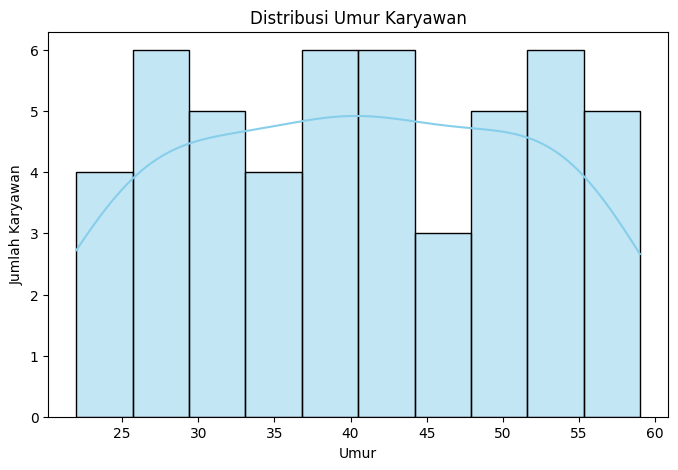

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram umur
plt.figure(figsize=(8, 5))
sns.histplot(df['umur'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Umur Karyawan')
plt.xlabel('Umur')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [6]:
pendidikan_stats = df.groupby('pendidikan').agg({
    'gaji': 'mean',
    'lama_bekerja': 'mean',
    'pendidikan': 'count'
}).rename(columns={'pendidikan': 'jumlah_karyawan'})

# Tampilkan hasil
print(pendidikan_stats)

                    gaji  lama_bekerja  jumlah_karyawan
pendidikan                                             
D3          1.168937e+07     11.750000               16
S1          1.163878e+07      8.642857               14
S2          1.102039e+07      9.555556                9
SMA         1.281335e+07     13.363636               11


Text(0.5, 1.0, 'Distribusi Gaji Karyawan')

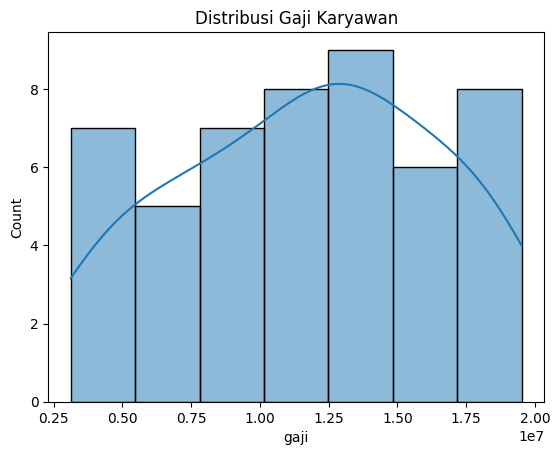

In [7]:
sns.histplot(df['gaji'], kde=True)
plt.title("Distribusi Gaji Karyawan")

Text(0.5, 1.0, 'Hubungan Umur dan Gaji Berdasarkan Jenis Kelamin')

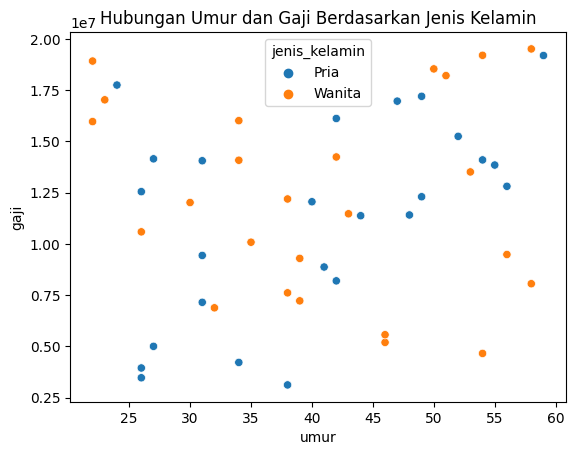

In [8]:
sns.scatterplot(data=df, x='umur', y='gaji', hue='jenis_kelamin')
plt.title("Hubungan Umur dan Gaji Berdasarkan Jenis Kelamin")

Text(0.5, 1.0, 'Distribusi Gaji Berdasarkan Pendidikan')

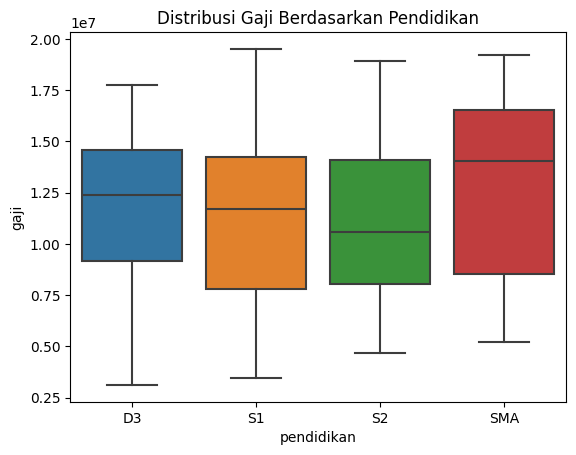

In [9]:
sns.boxplot(data=df, x='pendidikan', y='gaji')
plt.title("Distribusi Gaji Berdasarkan Pendidikan")

Text(0.5, 1.0, 'Gaji Berdasarkan Lama Bekerja dan Pendidikan')

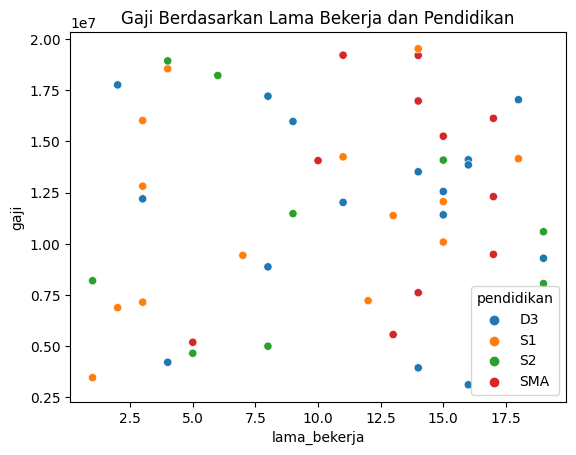

In [10]:
sns.scatterplot(data=df, x='lama_bekerja', y='gaji', hue='pendidikan')
plt.title("Gaji Berdasarkan Lama Bekerja dan Pendidikan")

In [11]:
gaji_pria = df[df['jenis_kelamin'] == 'Pria']['gaji']
gaji_wanita = df[df['jenis_kelamin'] == 'Wanita']['gaji']

t_stat, p_value = ttest_ind(gaji_pria, gaji_wanita)
# Tampilkan p-value
print(f"P-value uji t antara gaji pria dan wanita: {p_value}")
print(f"P-value uji t antara gaji pria dan wanita: {t_stat}")

P-value uji t antara gaji pria dan wanita: 0.5384622347205659
P-value uji t antara gaji pria dan wanita: -0.6195833227993618


In [12]:
groups = [df[df['pendidikan'] == p]['gaji'] for p in df['pendidikan'].unique()]
f_stat, p_value = f_oneway(*groups)
# Tampilkan p-value
print(f"P-value uji ANOVA untuk gaji berdasarkan pendidikan: {p_value}")
print(f"P-value uji ANOVA untuk gaji berdasarkan pendidikan: {f_stat}")

P-value uji ANOVA untuk gaji berdasarkan pendidikan: 0.8662213988605703
P-value uji ANOVA untuk gaji berdasarkan pendidikan: 0.24250817013887


Nilai p = 0.538 > 0.05 → Tidak signifikan
Artinya: tidak ada perbedaan gaji yang signifikan secara statistik antara pria dan wanita dalam dataset ini.

Nilai p = 0.866 > 0.05 → Tidak signifikan
Artinya: tidak ada perbedaan gaji yang signifikan antar kelompok pendidikan (SMA, D3, S1, S2).
Ini menunjukkan bahwa pada dataset ini, jenjang pendidikan tidak berpengaruh secara statistik terhadap gaji.

<Axes: >

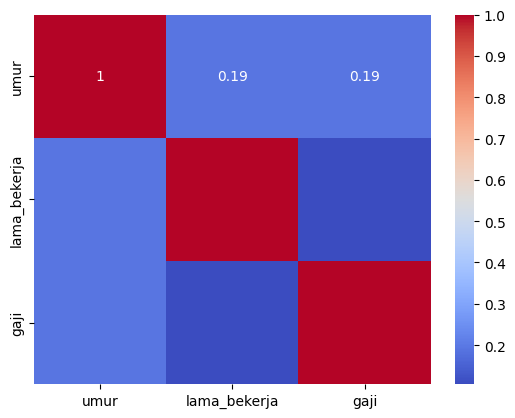

In [13]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [14]:
# Model regresi linier dengan formula
model = smf.ols('gaji ~ C(pendidikan) + lama_bekerja + umur', data=df).fit()

# Tampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gaji   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.4292
Date:                Thu, 03 Jul 2025   Prob (F-statistic):              0.826
Time:                        12:37:30   Log-Likelihood:                -838.10
No. Observations:                  50   AIC:                             1688.
Df Residuals:                      44   BIC:                             1700.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             8.395e+06 

| Variabel               | Koefisien | p-value | Signifikan? | Interpretasi                                              |
| ---------------------- | --------- | ------- | ----------- | --------------------------------------------------------- |
| **Intercept**          | 8.39 juta | 0.008   | ✅ Ya        | Gaji dasar (referensi: pendidikan = D3) sekitar 8.39 juta |
| `pendidikan = S1`      | +5 ribu   | 0.998   | ❌ Tidak     | Efeknya hampir nol, dan tidak signifikan                  |
| `pendidikan = S2`      | -712 ribu | 0.733   | ❌ Tidak     | Gaji lebih rendah dari D3, tapi tidak signifikan          |
| `pendidikan = SMA`     | +339 ribu | 0.868   | ❌ Tidak     | Juga tidak signifikan                                     |
| `lama_bekerja` (tahun) | +51 ribu  | 0.704   | ❌ Tidak     | Tiap tahun kerja naik 51 ribu, tapi tidak signifikan      |
| `umur`                 | +71 ribu  | 0.292   | ❌ Tidak     | Gaji naik 71 ribu per tahun umur, tapi tidak signifikan   |
